<a href="https://colab.research.google.com/github/SujataPahi2004/ML_CV-AR_CODE/blob/main/basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Basic Libraries needed
- cv2
- numpy: images are stored as numpy array

In [ ]:
%matplotlib inline
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Basic Operations
|Task     | Command                 | Return                     |
|---------|:-----------------------:|---------------------------:|
| Reading | `imread(filename, flag)`| image as numpy.ndarray     |
| Showing |`imshow(window, image)`  | none                       |
| Wait    | `waitKey(time)`         | ASCII code of key pressed  |

**IMPORTANT:** While using jupyter notebook ensure that you use the following command after every `imshow`:
```python
#Wait till key is pressed
k=cv2.waitKey(0)
#Close all the windows    
cv2.destroyAllWindows()
```

In [ ]:
#Reading an image(grayscale) - even if it is colored
image = cv2.imread("/content/joker_1.jpg",0)

In [ ]:
print(image.shape)

#if you want to print the whole numpy array add these two lines
#import sys
#np.set_printoptions(threshold=sys.maxsize)


(1904, 1413)


In [ ]:
#checking type of image
print("The loaded image is of type:",type(image))
print("The loaded image is of size:",image.shape)
print("intensity at index", image[750][750])
image.size

The loaded image is of type: <class 'numpy.ndarray'>
The loaded image is of size: (1904, 1413)
intensity at index 248


2690352

In [ ]:
#Resizing the image because it is huge!
image = cv2.resize(image, (720, 720))
print("size is",image.shape)

size is (720, 720)


In [ ]:
# checking some values?
print(type(image[710][132]))
#error index out of range will get generated if you resize the image size to 720 to 720, as now only 720 pixels are there
#so the numpy array doesn't have indices beyond 720
#uint8 - 8 bit unsigned integer, so 0 to 255
#double(image)/255 -> 0-1 -> ^gamma -> uint8()

<class 'numpy.uint8'>


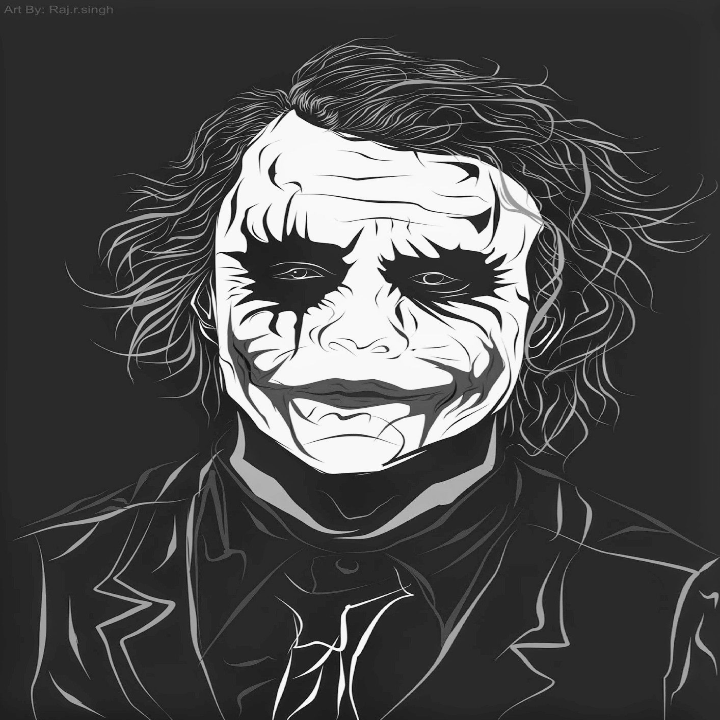

-1


In [ ]:
#Displaying the image
#in other ides you can use cv2.imshow("window name", imae) -> for google colab you have to use cv2_imshow(image)
cv2_imshow(image)
#Wait till key is pressed
k=cv2.waitKey(1000)
#Close all the windows
cv2.destroyAllWindows()
print(k)

#Thus if the wait time is entered as 6000
#the picture will be displayed for 6s
#then get closed (provided you have cv2.destroyAllWindows() in the script).
#If you use ‘0’ as the parmater then the image will be displayed for infinite time
#until you press the esc key.
#k will print the ascii value of the key pressed.



In [ ]:
im = np.array([[0,0,0],[0,0,0],[0,255,0],[0,0,0],[0,0,0],[0,0,0]], dtype=np.uint8)
#we created a numpy array with datatype unsigned int
#then we interreted it as an image using cv2
cv2_imshow(im)
k = cv2.waitKey(100)
cv2.destroyAllWindows()

# Color Spaces
`cv2.split(image)`: split the image into various channels

`cv2.cvtColor(src, code)`: convert the `src` depending on the `code`

In [ ]:
image = cv2.imread('/content/gdrive/Shareddrives/ImageProcessing/joker_1.jpg',1)
#flag 1 is used to read it as a colored image

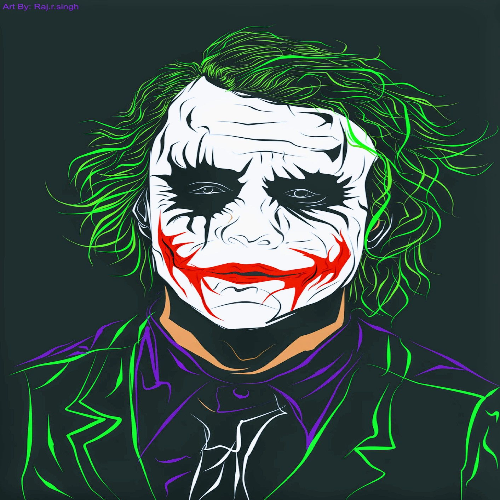

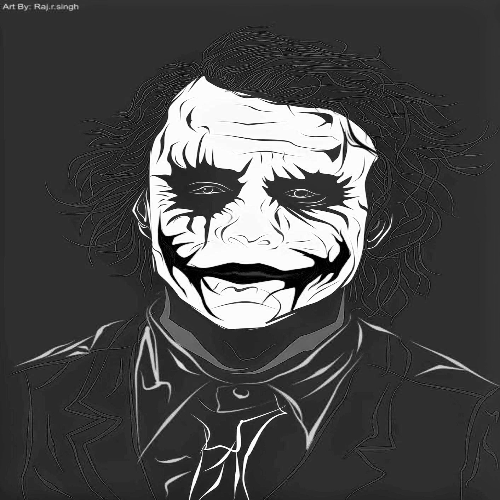

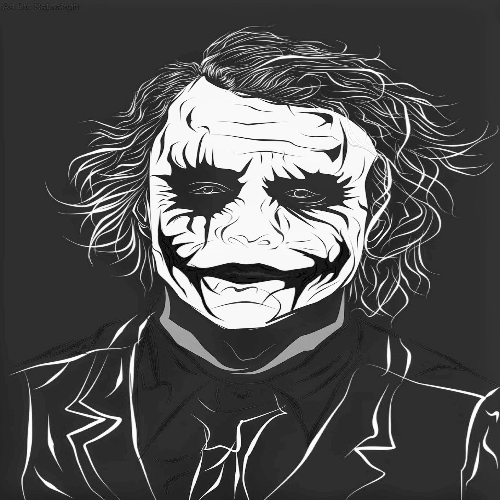

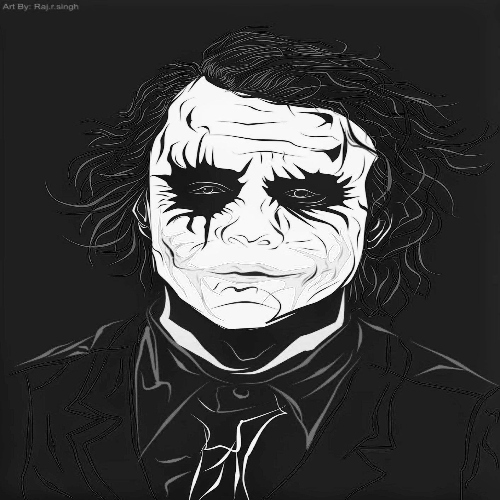

In [ ]:
image = cv2.imread('/content/gdrive/Shareddrives/ImageProcessing/joker_1.jpg',1)
image = cv2.resize(image,(500, 500))
#separating each color. Note the order of colors
#to separate each channel use the function split
image[:,:,0] #this will give blue channel
image[:,:,1]#green
image[:,:,2]#red
#or use split function, note that it is bgr and not rgb
B,G,R = cv2.split(image)

cv2_imshow(image)
cv2_imshow(B)
cv2_imshow(G)
cv2_imshow(R)

#Wait till key is pressed
k=cv2.waitKey(0)
#Close all the windows
cv2.destroyAllWindows()

In [ ]:
 #Converting in hsv
# COLOR_<current format>2<new format> 2 is just a separator
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
#hsv value for white is 0,0,255 - h is zero by default for white, saturation is zero bcz we don't want any color in that
#value is max i.e 255
#Convering in grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

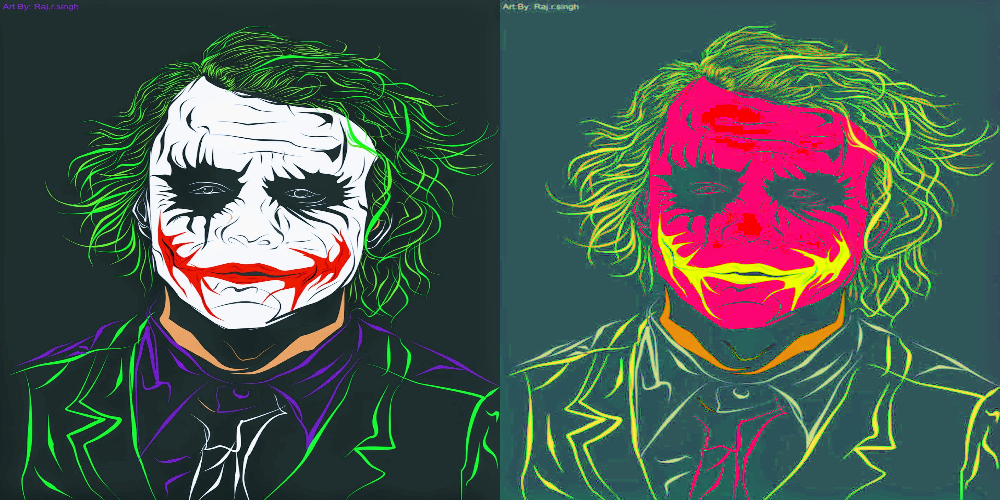

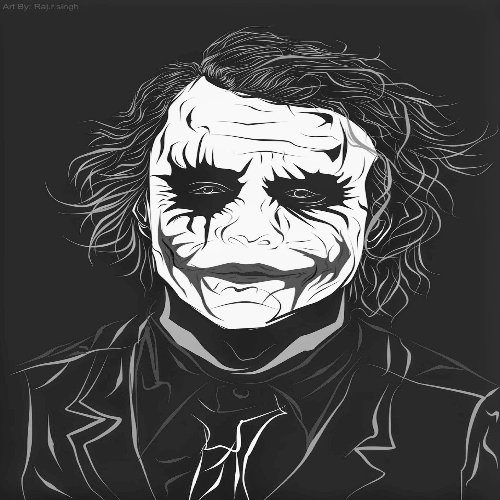

In [ ]:
#showing all the images
cv2_imshow(np.hstack([image, hsv]))
cv2_imshow(gray)

#Wait till key is pressed
k=cv2.waitKey(0)
#Close all the windows
cv2.destroyAllWindows()

# Thresholding
![all the commands](https://media.geeksforgeeks.org/wp-content/uploads/20190505162413/Screenshot-4113.png)


In digital image processing, thresholding is the simplest method of segmenting images. It is a way to create a binary image from a grayscale image. This is typically done in order to separate "object" or foreground pixels from background pixels. We need binary images because they are easier to analyse (using morphological effects).


In [ ]:
gray = cv2.resize(gray,(500 ,500))

#Simple Thresholds
ret, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO_INV)


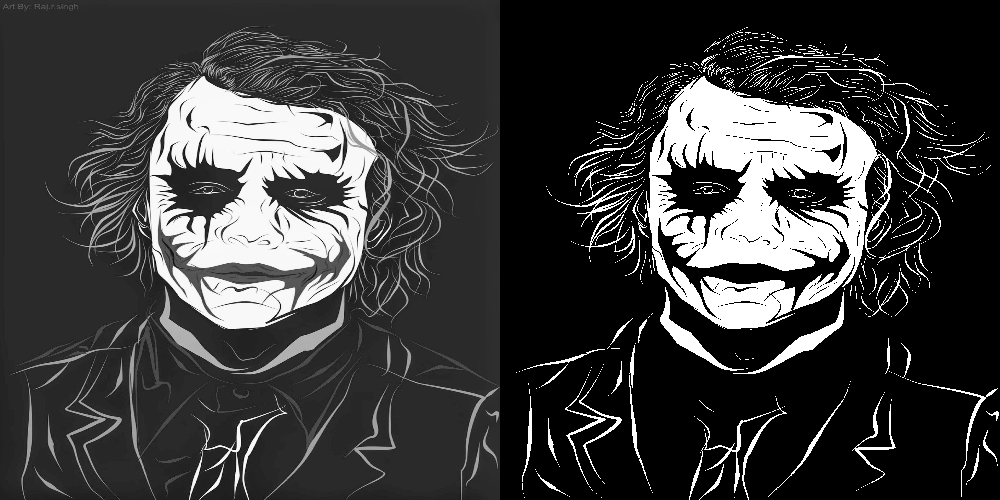

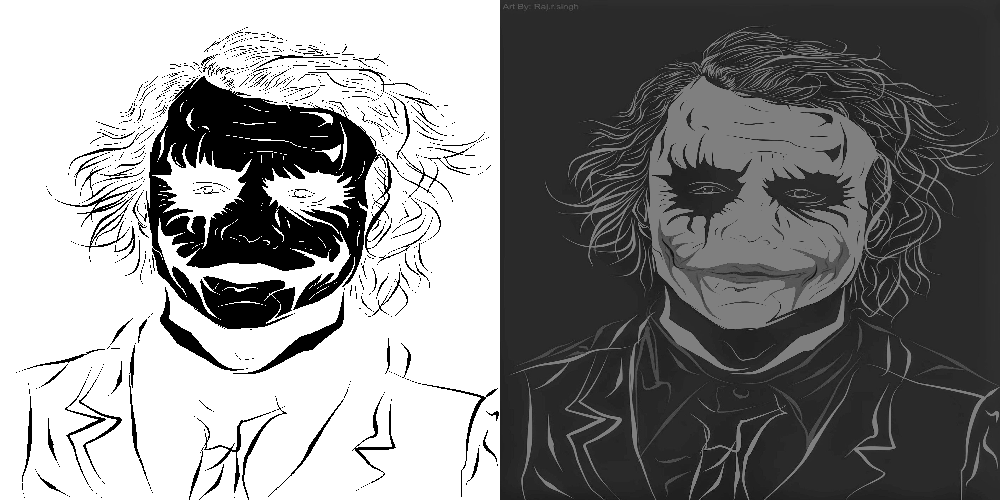

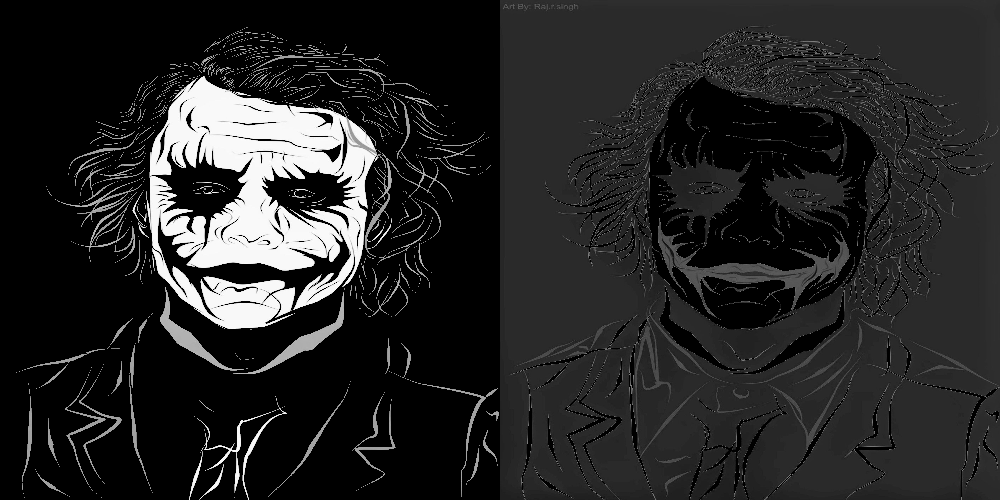

In [ ]:
#displaying the threshold images
cv2_imshow(np.hstack([gray, thresh1]))
cv2_imshow(np.hstack([thresh2, thresh3]))
cv2_imshow(np.hstack([thresh4, thresh5]))

In [ ]:
#Adaptive threshold
adaptive_thresh1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
adaptive_thresh2 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
#block size must be greater than 1 and odd, otherwise you get that assertion failed

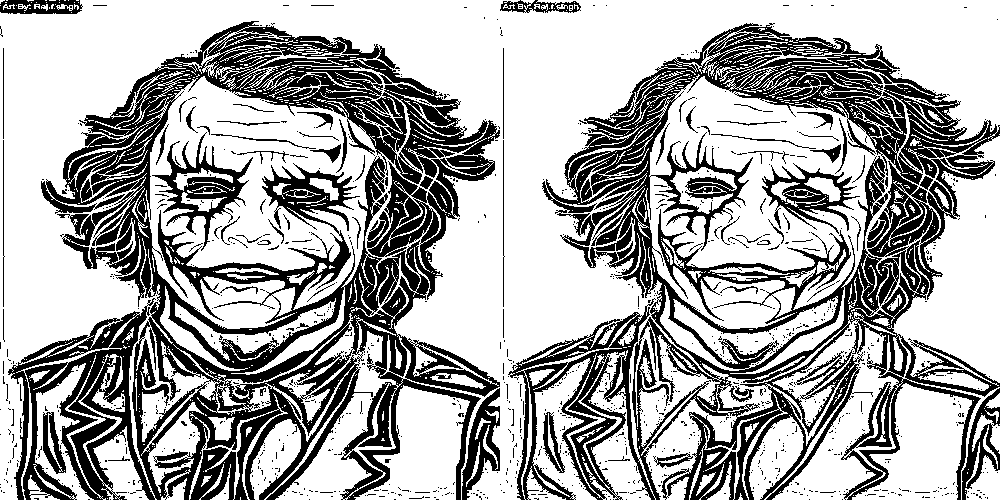

In [ ]:
#displaying the threshold images
cv2_imshow(np.hstack([adaptive_thresh1,adaptive_thresh2]))

#Wait till key is pressed
k=cv2.waitKey(0)
#Close all the windows
cv2.destroyAllWindows()

similar to filters that converts the image to sketches.
So one application of adaptive thresholding could be edge detection.

# Color Detection
The hsv image is used to detect the color as all the chromatic information is in one band.
HUE: The hues are modeled as an angular dimension that encodes color information.
SATURATION: Saturation encodes the intensity of color.
VALUE: Value represents the amount to which that respective color is mixed with black.

cv2.cvtColor() function converts colorspace.
The lower and upper bounds are the boundaries of the color.
inRange() function returns a binary mask of the frame where the green color is present.

Here we can see that in the frame wherever the green color is detected the mask shows that as white and the rest of the region as black.

In [ ]:
# Getting the color values in HSV
col = np.uint8([[[0,255,0]]]) #uint is unsigned int
cv2.cvtColor(col, cv2.COLOR_BGR2HSV)

array([[[ 60, 255, 255]]], dtype=uint8)

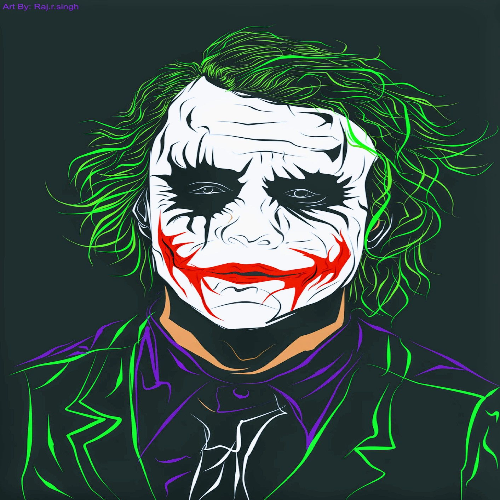

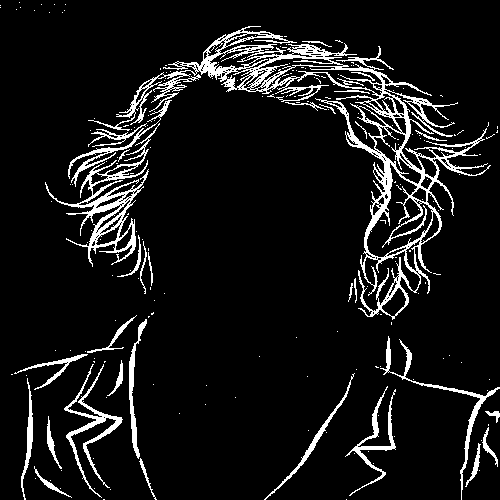

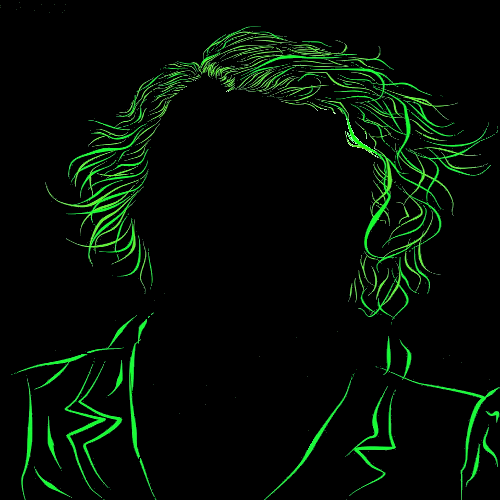

In [ ]:
lower = np.array([50,50,50]) #Defining lower range
upper = np.array([70, 255, 255]) #Defining upper limit
mask = cv2.inRange(hsv, lower, upper) #Using the inRange function to give a binary mask
extracted = cv2.bitwise_and(image,image,mask=mask) #applying the mask on the image

cv2_imshow(image)
cv2_imshow(mask)
cv2_imshow(extracted)

#Wait till key is pressed
k=cv2.waitKey(0)
#Close all the windows
cv2.destroyAllWindows()

Put simply, a mask allows us to focus only on the portions of the image that interests us.

Using these basic functions we can make a color detector.

For example, let’s say that we were building a computer vision system to recognize faces. The only part of the image we are interested in finding and describing is the parts of the image that contain faces — we simply don’t care about the rest of the image’s content. Provided that we could find the faces in the image, we may construct a mask to show only the faces in the image.


# Blur

Blurring of an image is done using filters. Depending on the kernel used, the blurring effect is different.

Major Blur Filters:
1. Box Filters( `cv2.blur(image, size)` )
1. Gaussian Filters( `cv2.GaussianBlur(image, size, sigmaX)` )
1. Median Filters( `cv2.medianBlur(image, ksize)` )

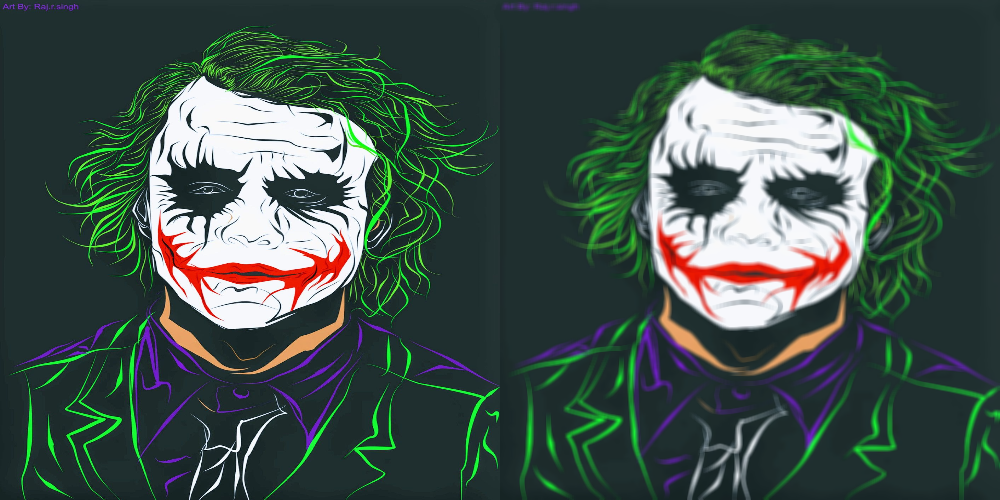

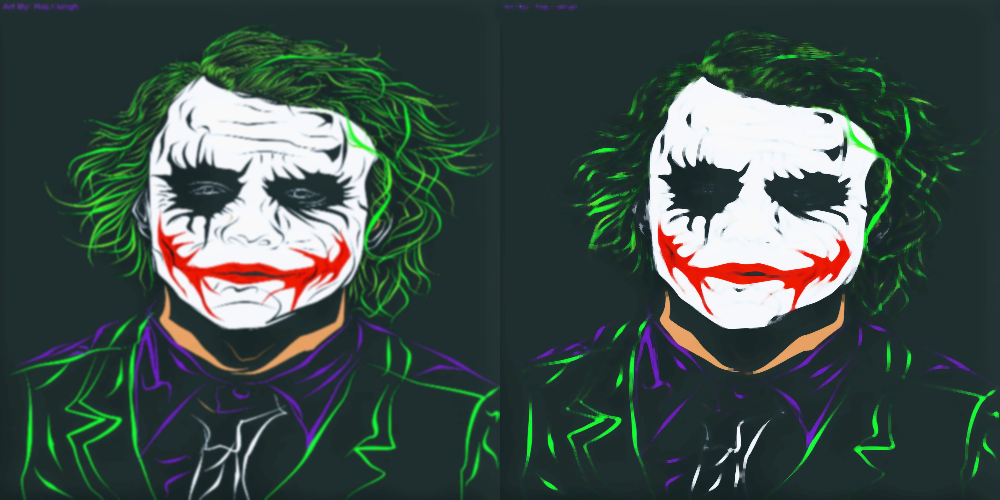

In [ ]:
# size
kernel = 5

#box filter
blurred_img_B = cv2.blur(image, (kernel, kernel))
#gaussian filter
blurred_img_G = cv2.GaussianBlur(image, (kernel, kernel), 0)
#median filter
blurred_img_M = cv2.medianBlur(image, kernel)
image = cv2.resize(image, (500,500))
blurred_img_B = cv2.resize(blurred_img_B, (500,500))
blurred_img_G = cv2.resize(blurred_img_G, (500, 500))
blurred_img_M = cv2.resize(blurred_img_M, (500, 500))
cv2_imshow(np.hstack([image, blurred_img_B]))
cv2_imshow(np.hstack([blurred_img_G, blurred_img_M]))

#Wait till key is pressed
k=cv2.waitKey(0)
#Close all the windows
cv2.destroyAllWindows()

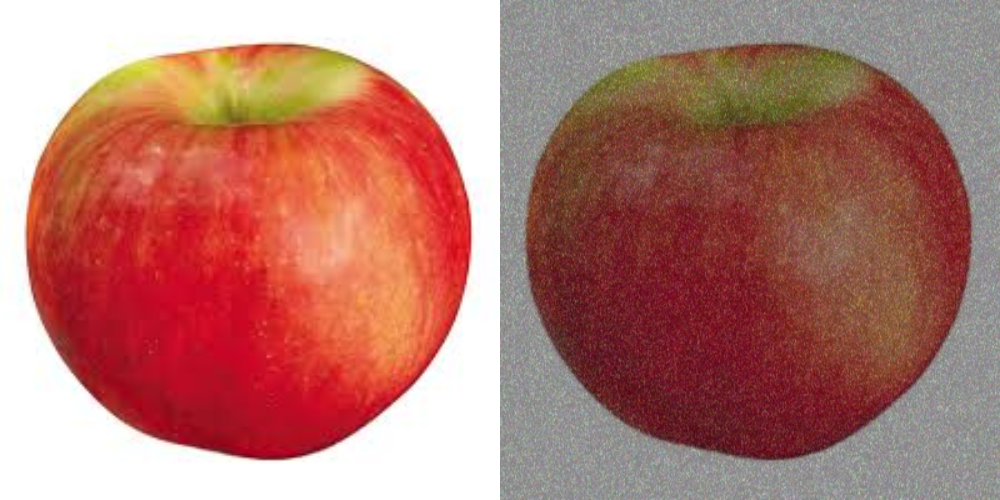

In [ ]:
# some noise experiments

#reading in the noisy image and making both image and noise of same size
noisy_image = cv2.imread('/content/gdrive/Shareddrives/ImageProcessing/noisy_apple.jpg',1)
image1 = cv2.imread('/content/gdrive/Shareddrives/ImageProcessing/apple.jpeg',1)
noisy_image = cv2.resize(noisy_image, (500, 500))
image1 = cv2.resize(image1,(500, 500))

cv2_imshow(np.hstack([image1, noisy_image]))

#Wait till key is pressed
k=cv2.waitKey(0)
#Close all the windows
cv2.destroyAllWindows()

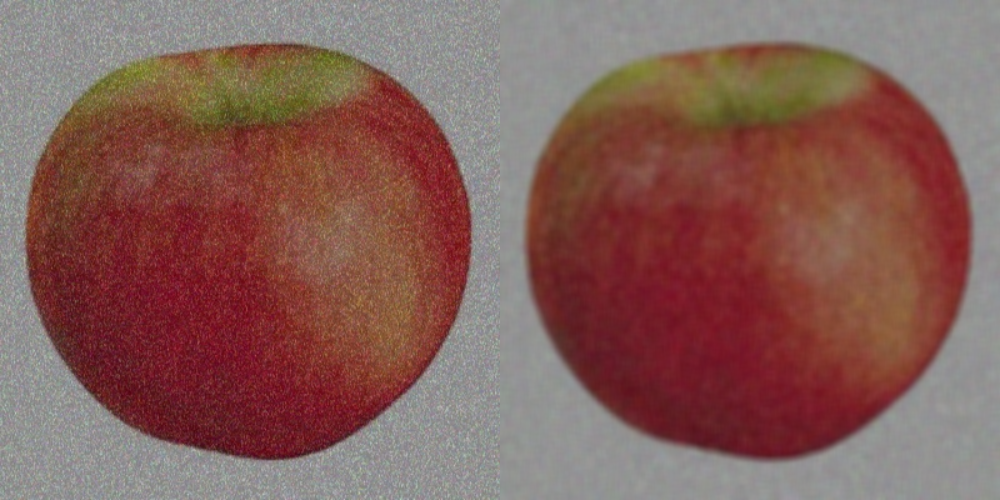

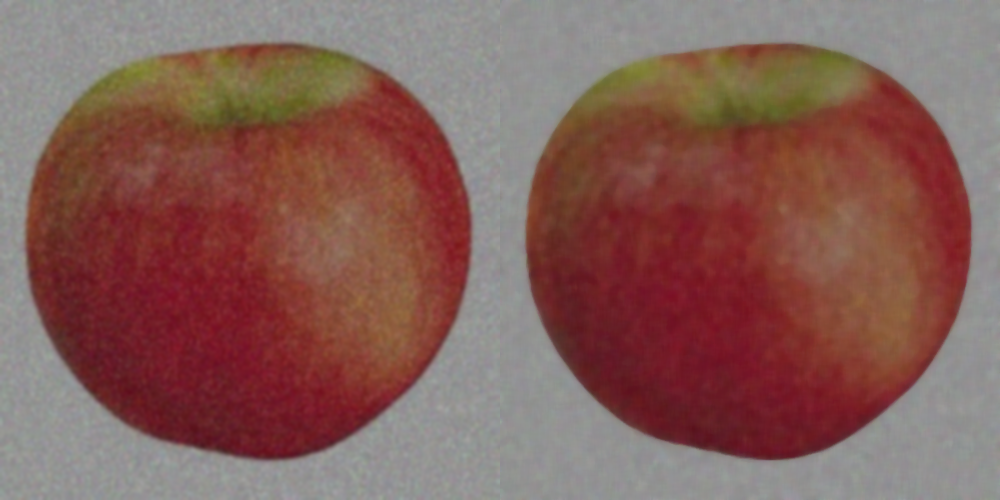

In [ ]:
 # size
kernel = 9

#box filter
blurred_img_B = cv2.blur(noisy_image, (kernel, kernel), 0)
#gaussian filter
blurred_img_G = cv2.GaussianBlur(noisy_image, (kernel, kernel), 0)
#median filter
blurred_img_M = cv2.medianBlur(noisy_image, kernel)

cv2_imshow(np.hstack([noisy_image,blurred_img_B]))
cv2_imshow(np.hstack([blurred_img_G,blurred_img_M]))
#Wait till key is pressed
k=cv2.waitKey(0)
#Close all the windows
cv2.destroyAllWindows()

# Histogram equilisation
Histogram equalization is good when histogram of the image is confined to a particular region. It won't work good in places where there is large intensity  variations where histogram covers a large region, ie both bright and dark pixels are present

only for gray scale image


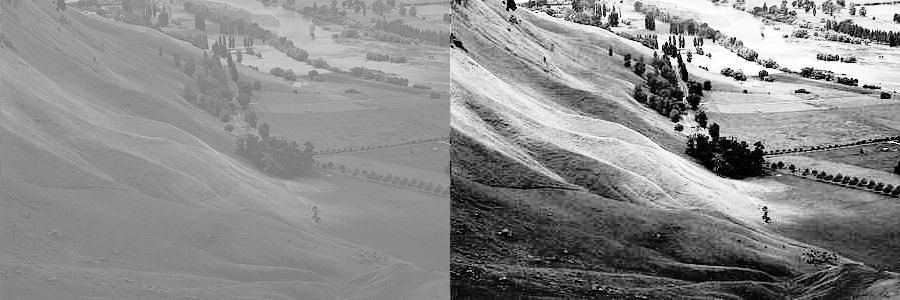

-1


In [ ]:
img = cv2.imread("/content/gdrive/Shareddrives/ImageProcessing/hist_eq.jpg")

R, G, B = cv2.split(img)

output1_R = cv2.equalizeHist(R)
output1_G = cv2.equalizeHist(G)
output1_B = cv2.equalizeHist(B)

equ = cv2.merge((output1_R, output1_G, output1_B))
# show image input vs output
cv2_imshow(np.hstack([img, equ]))

k=cv2.waitKey(1)
#Close all the windows
cv2.destroyAllWindows()
print(k)

## Morphology
on binary images.
kernel slides through the image (as in 2D convolution).

**Erosion** - pixel in original image will be considered 1 only if all the pixels under the kernel is 1, otherwise made to zero

**Dilation** - pixel element is '1' if at least one pixel under the kernel is '1'

**Opening** - erosion followed by dilation - remove noise

**Closing** - Dilation followed by Erosion - closing small holes inside the foreground object

**Morphological gradient** - difference between dilation and erosion


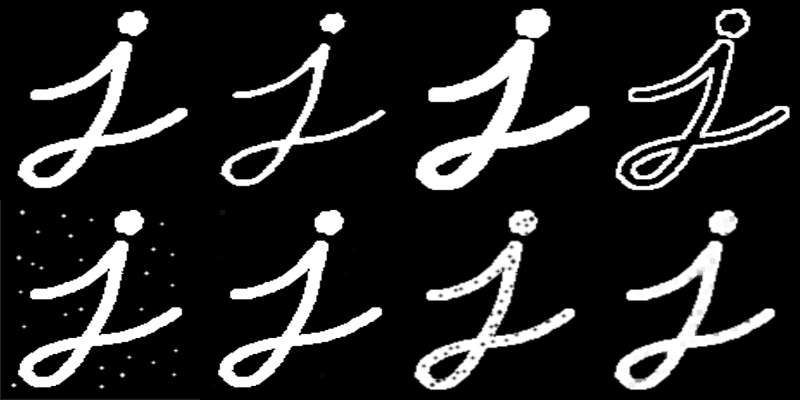

In [ ]:
morph = cv2.imread("/content/gdrive/Shareddrives/ImageProcessing/morph.png")
noise_op = cv2.imread("/content/gdrive/Shareddrives/ImageProcessing/opening.png", 1)
noise_cl = cv2.imread("/content/gdrive/Shareddrives/ImageProcessing/closing.png", 1)

noise_op = cv2.resize(noise_op, (200, 200))
noise_cl = cv2.resize(noise_cl, (200, 200))
morph = cv2.resize(morph, (200, 200))

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(morph, kernel, iterations=1)
dilate = cv2.dilate(morph, kernel, iterations=1)
opening = cv2.morphologyEx(noise_op, cv2.MORPH_OPEN , kernel)
closing = cv2.morphologyEx(noise_cl, cv2.MORPH_CLOSE, kernel)
grad = cv2.morphologyEx(morph, cv2.MORPH_GRADIENT , kernel)

cv2_imshow(np.vstack([np.hstack([morph, erosion, dilate, grad]), np.hstack([noise_op, opening, noise_cl, closing])]))

m = cv2.waitKey(0)
cv2.destroyAllWindows()

## Video Capture
Jupyter notebook/ Google Collab may get hanged when showing video/ so you can use Pycharm/ VSCode ID.

In [ ]:
# cap = cv2.VideoCapture(0)
# if not cap.isOpened():
#     print("Cannot open camera")
#     exit()
# while True:
#     return_val, frame = cap.read()
#     cv2.imshow("showing video", frame)
#     if(cv2.waitKey(1) & 0XFF == ord('q')):
#         break


##Canny edge detection

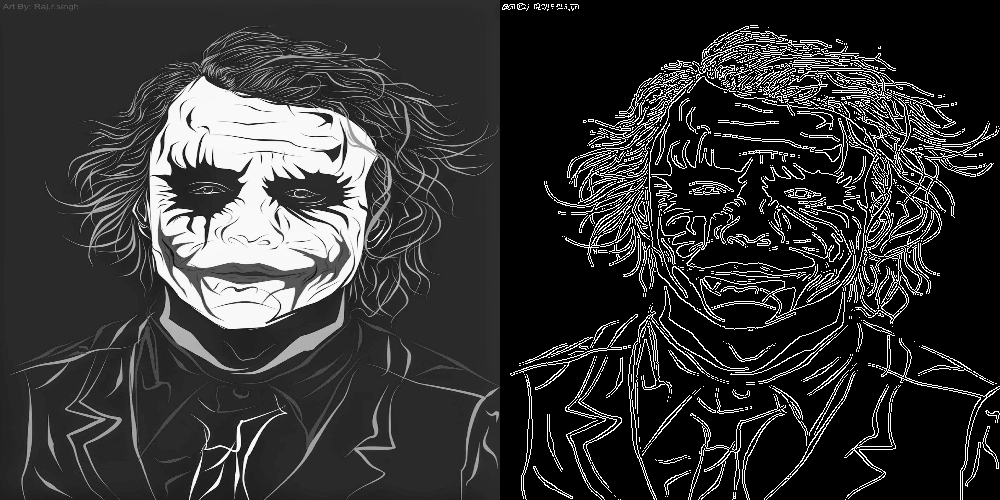

In [ ]:
image = cv2.imread("/content/gdrive/Shareddrives/ImageProcessing/joker_1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (500, 500))

edges = cv2.Canny(gray, 100, 100)
cv2_imshow(np.hstack([gray, edges]))
q = cv2.waitKey(0)
cv2.destroyAllWindows()